In [81]:
%matplotlib inline
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.autograd import Variable

### Setup Neural Network Architecture

In [204]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 1)
        
    def forward(self, x):
        x = F.dropout(F.relu(self.fc1(x)), p = 0.5) + torch.sin(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Function to train a network

In [205]:
def train_net(x_train, y_train, epochs = 2000, lr = 0.001, momentum = 0.9, plot = True):
    
    net = Net()
    
    criterion = nn.SmoothL1Loss()
    optimizer = optim.Adam(net.parameters(), lr = lr)
    
    try:   
        for epoch in range(epochs):

            y_pred = net(x_train)

            loss = criterion(y_pred, y_train)

            epoch_loss = loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if epoch % 500 == 0:
                print('epoch {}, loss {}'.format(epoch, epoch_loss))
                
    except KeyboardInterrupt:
        return net
    
    if plot:
        with torch.no_grad():
            y_pred = net(x_train)

            plt.scatter(x_train, y_train, label = 'True', color = 'blue')
            plt.scatter(x_train, y_pred, label = 'Predicted', color = 'orange')
            plt.legend()
            plt.grid()
            plt.show()
    
    return net

### Function to display true data and predictions

In [198]:
def show_results(net, x_test, y_test, scatter = True):
    
    with torch.no_grad():
        y_pred_test = net(x_test).numpy()
        y_test = y_test.numpy()
        x_test = x_test.numpy()

        
        if scatter:
            plot_func = partial(plt.scatter, s = 10)
        else:
            plot
        
        plt.scatter(x_test, y_pred_test, label = 'Predicted', color = 'orange', s = 10)
        plt.scatter(x_test, y_test, label = 'True', color = 'blue', s = 10)
        plt.xlabel('Seconds (s)')
        plt.ylabel('Heart Rate (bpm)')
        plt.grid()
        plt.legend()
        plt.show

### Function that splits the data into train/test split. Can randomly select data or choose to split in order.

In [199]:
def train_test_split(x, y, test = 0.2, shuffle = True):
    
    n = len(x)
    
    indices = np.arange(n)
    
    if shuffle:
        np.random.shuffle(indices)
    
    train_split = 1 - test
    ntrain = int(len(x) * train_split)
    
    train_indices, test_indices = indices[:ntrain], indices[ntrain:]
    
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return x_train, x_test, y_train, y_test

### Function that generates truth data. Can specify the function that maps inputs to outputs.

In [200]:
def makeData(npoints = 500, f = None):
    
    if f is None:
        f = lambda x: x*x + 10
    
    x = np.random.rand(npoints) * 40 - 20
    
    y = np.array(list(map(f, x)))
    
    x = torch.Tensor(x).view(-1, 1)
    y = torch.Tensor(y).view(-1, 1)
    
    return x, y

#### Simple function that plots data

In [201]:
def plot_helper(x, y, label = 'Data'):
    plt.scatter(x, y, label = label, s = 10)
    plt.legend()
    plt.show()

## Generate data and split into train/test

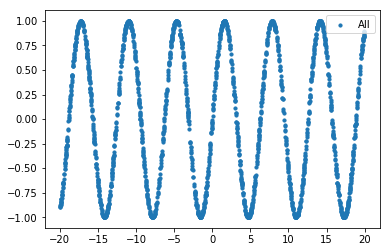

In [215]:
x, y = makeData(2000, f = lambda x: np.sin(x))

plot_helper(x, y, 'All')

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = False)

#plot_helper(x_train, y_train, 'Training')
#plot_helper(x_test, y_test, 'Testing')

In [218]:
x.size()

torch.Size([2000, 1])

## Train a network, and show the results

In [216]:
net = train_net(x_train, y_train, epochs = 5000, lr = 0.001, plot = False)

epoch 0, loss 1.150296926498413
epoch 500, loss 0.003383497940376401
epoch 1000, loss 0.0013134831096976995
epoch 1500, loss 0.0007723916205577552
epoch 2000, loss 0.0005168235511519015
epoch 2500, loss 0.00037618487840518355
epoch 3000, loss 0.0002812272869050503
epoch 3500, loss 0.0002274714788654819
epoch 4000, loss 0.00019018749298993498
epoch 4500, loss 0.00012569523823913187


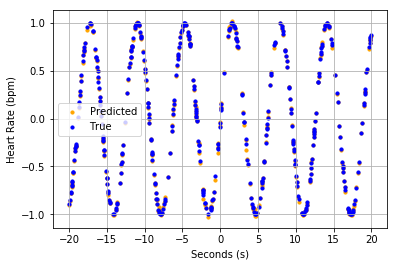

In [217]:
show_results(net, x_test, y_test)

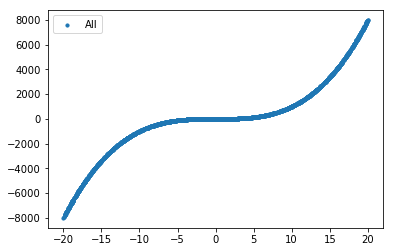

epoch 0, loss 2081.52294921875
epoch 500, loss 2075.210693359375
epoch 1000, loss 2058.77783203125
epoch 1500, loss 2028.49609375
epoch 2000, loss 1986.96240234375
epoch 2500, loss 1931.7823486328125
epoch 3000, loss 1861.7783203125
epoch 3500, loss 1792.868896484375
epoch 4000, loss 1712.5712890625
epoch 4500, loss 1632.50732421875
epoch 5000, loss 1562.0780029296875
epoch 5500, loss 1491.189697265625
epoch 6000, loss 1431.6473388671875
epoch 6500, loss 1383.212158203125
epoch 7000, loss 1341.04931640625
epoch 7500, loss 1302.696044921875
epoch 8000, loss 1278.8914794921875
epoch 8500, loss 1243.1800537109375
epoch 9000, loss 1224.0194091796875
epoch 9500, loss 1222.2105712890625


In [212]:
x, y = makeData(2000, f = lambda x: x ** 3)

plot_helper(x, y, 'All')

x_train, x_test, y_train, y_test = train_test_split(x, y)

net = train_net(x_train, y_train, epochs = 10000, lr = 0.0001, plot = False)

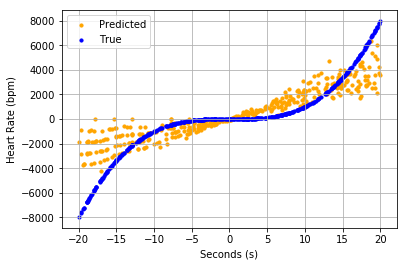

In [214]:
show_results(net, x_test, y_test)

## Now using real heart rate data

#### Raw data

In [34]:
df = pd.read_csv('heart_rate_data.csv')

In [35]:
df.head()

,Time,Value
0,10/1/17 0:00,57
1,10/1/17 0:00,58
2,10/1/17 0:00,58
3,10/1/17 0:00,58
4,10/1/17 0:00,58


In [102]:
print(len(df))

122247


#### Transform time column to 0...n seconds

In [36]:
t = np.arange(len(df))
df['Time'] = t
df.head()

,Time,Value
0,0,57
1,1,58
2,2,58
3,3,58
4,4,58


#### Get x (time) and y (hear beats)

In [104]:
x = torch.Tensor(df['Time'].values).view(-1, 1)
y = torch.Tensor(df['Value'].values).view(-1, 1)

In [105]:
print(x.shape)
print(y.shape)

torch.Size([122247, 1])
torch.Size([122247, 1])


#### Only pick the first n points, to reduce training time

In [106]:
npts = 200
x_train, x_test, y_train, y_test = train_test_split(x[:npts], y[:npts], shuffle = False)

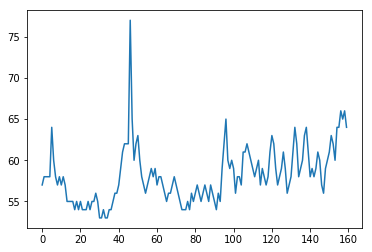

In [109]:
plt.plot(x_train.numpy(), y_train.numpy())

epoch 0, loss 1190.5499267578125
epoch 500, loss 23.220211029052734
epoch 1000, loss 11.269136428833008
epoch 1500, loss 6.8907012939453125
epoch 2000, loss 2.399200677871704
epoch 2500, loss 2.247368335723877
epoch 3000, loss 2.0037875175476074
epoch 3500, loss 1.9687868356704712


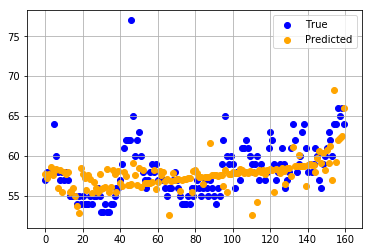

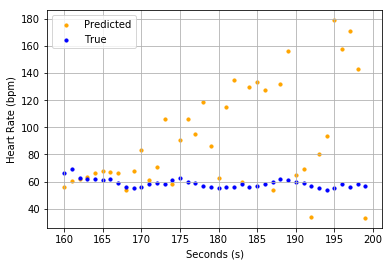

In [110]:
net = train_net(x_train, y_train, epochs = 4000, lr = 0.001)
show_results(net, x_test, y_test)

#### A regular neural network is not suitable for time series predictions, now to try an RNN

In [62]:
class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        out, _ = self.lstm(x, (h0, c0))
        
        out = self.fc(out[:, -1, :])
        return out

In [63]:
sequence_length = 28
input_size = 79
hidden_size = 50
num_layers = 2
num_classes = 1
batch_size = 32
num_epochs = 500
learning_rate = 0.001

rnn = RNN(input_size, hidden_size, num_layers, num_classes)

In [64]:
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(rnn.parameters(), lr = learning_rate)

In [65]:
x_train, y_train = y_train[:-1], y_train[1:]

In [66]:
x_test, y_test = y_test[:-1], y_test[1:]

In [67]:
train_net(rnn, x_train, y_train)

RuntimeError: input must have 3 dimensions, got 2